In [1]:
import matplotlib.pyplot as plt
import json

from pathlib import Path

data = json.loads((Path.cwd() / "results.json").read_bytes())


In [2]:
import numpy as np


sizes = np.array(data["sizes"])
results_slow = np.array(data["results_slow"]) / 1000
results_slow_2 = np.array(data["results_slow_2"]) / 1000
results_fast = np.array(data["results_fast"]) / 1000
results_fast_2 = np.array(data["results_fast_2"]) / 1000
results_fast_3 = np.array(data["results_fast_3"]) / 1000


In [3]:
def to_bytes(i):
    if i > 1024 * 1024 * 1024:
        return f"{i // (1024 * 1024)}MB"
    if i > 1024 * 1024:
        return f"{i // (1024 * 1024)}KB"
    if i > 1024:
        return f"{i // 1024}KB"

    return f"{i}B"


In [4]:
labels = [f"{to_bytes(i * i * 8)} ({i}x{i})" for i in sizes]


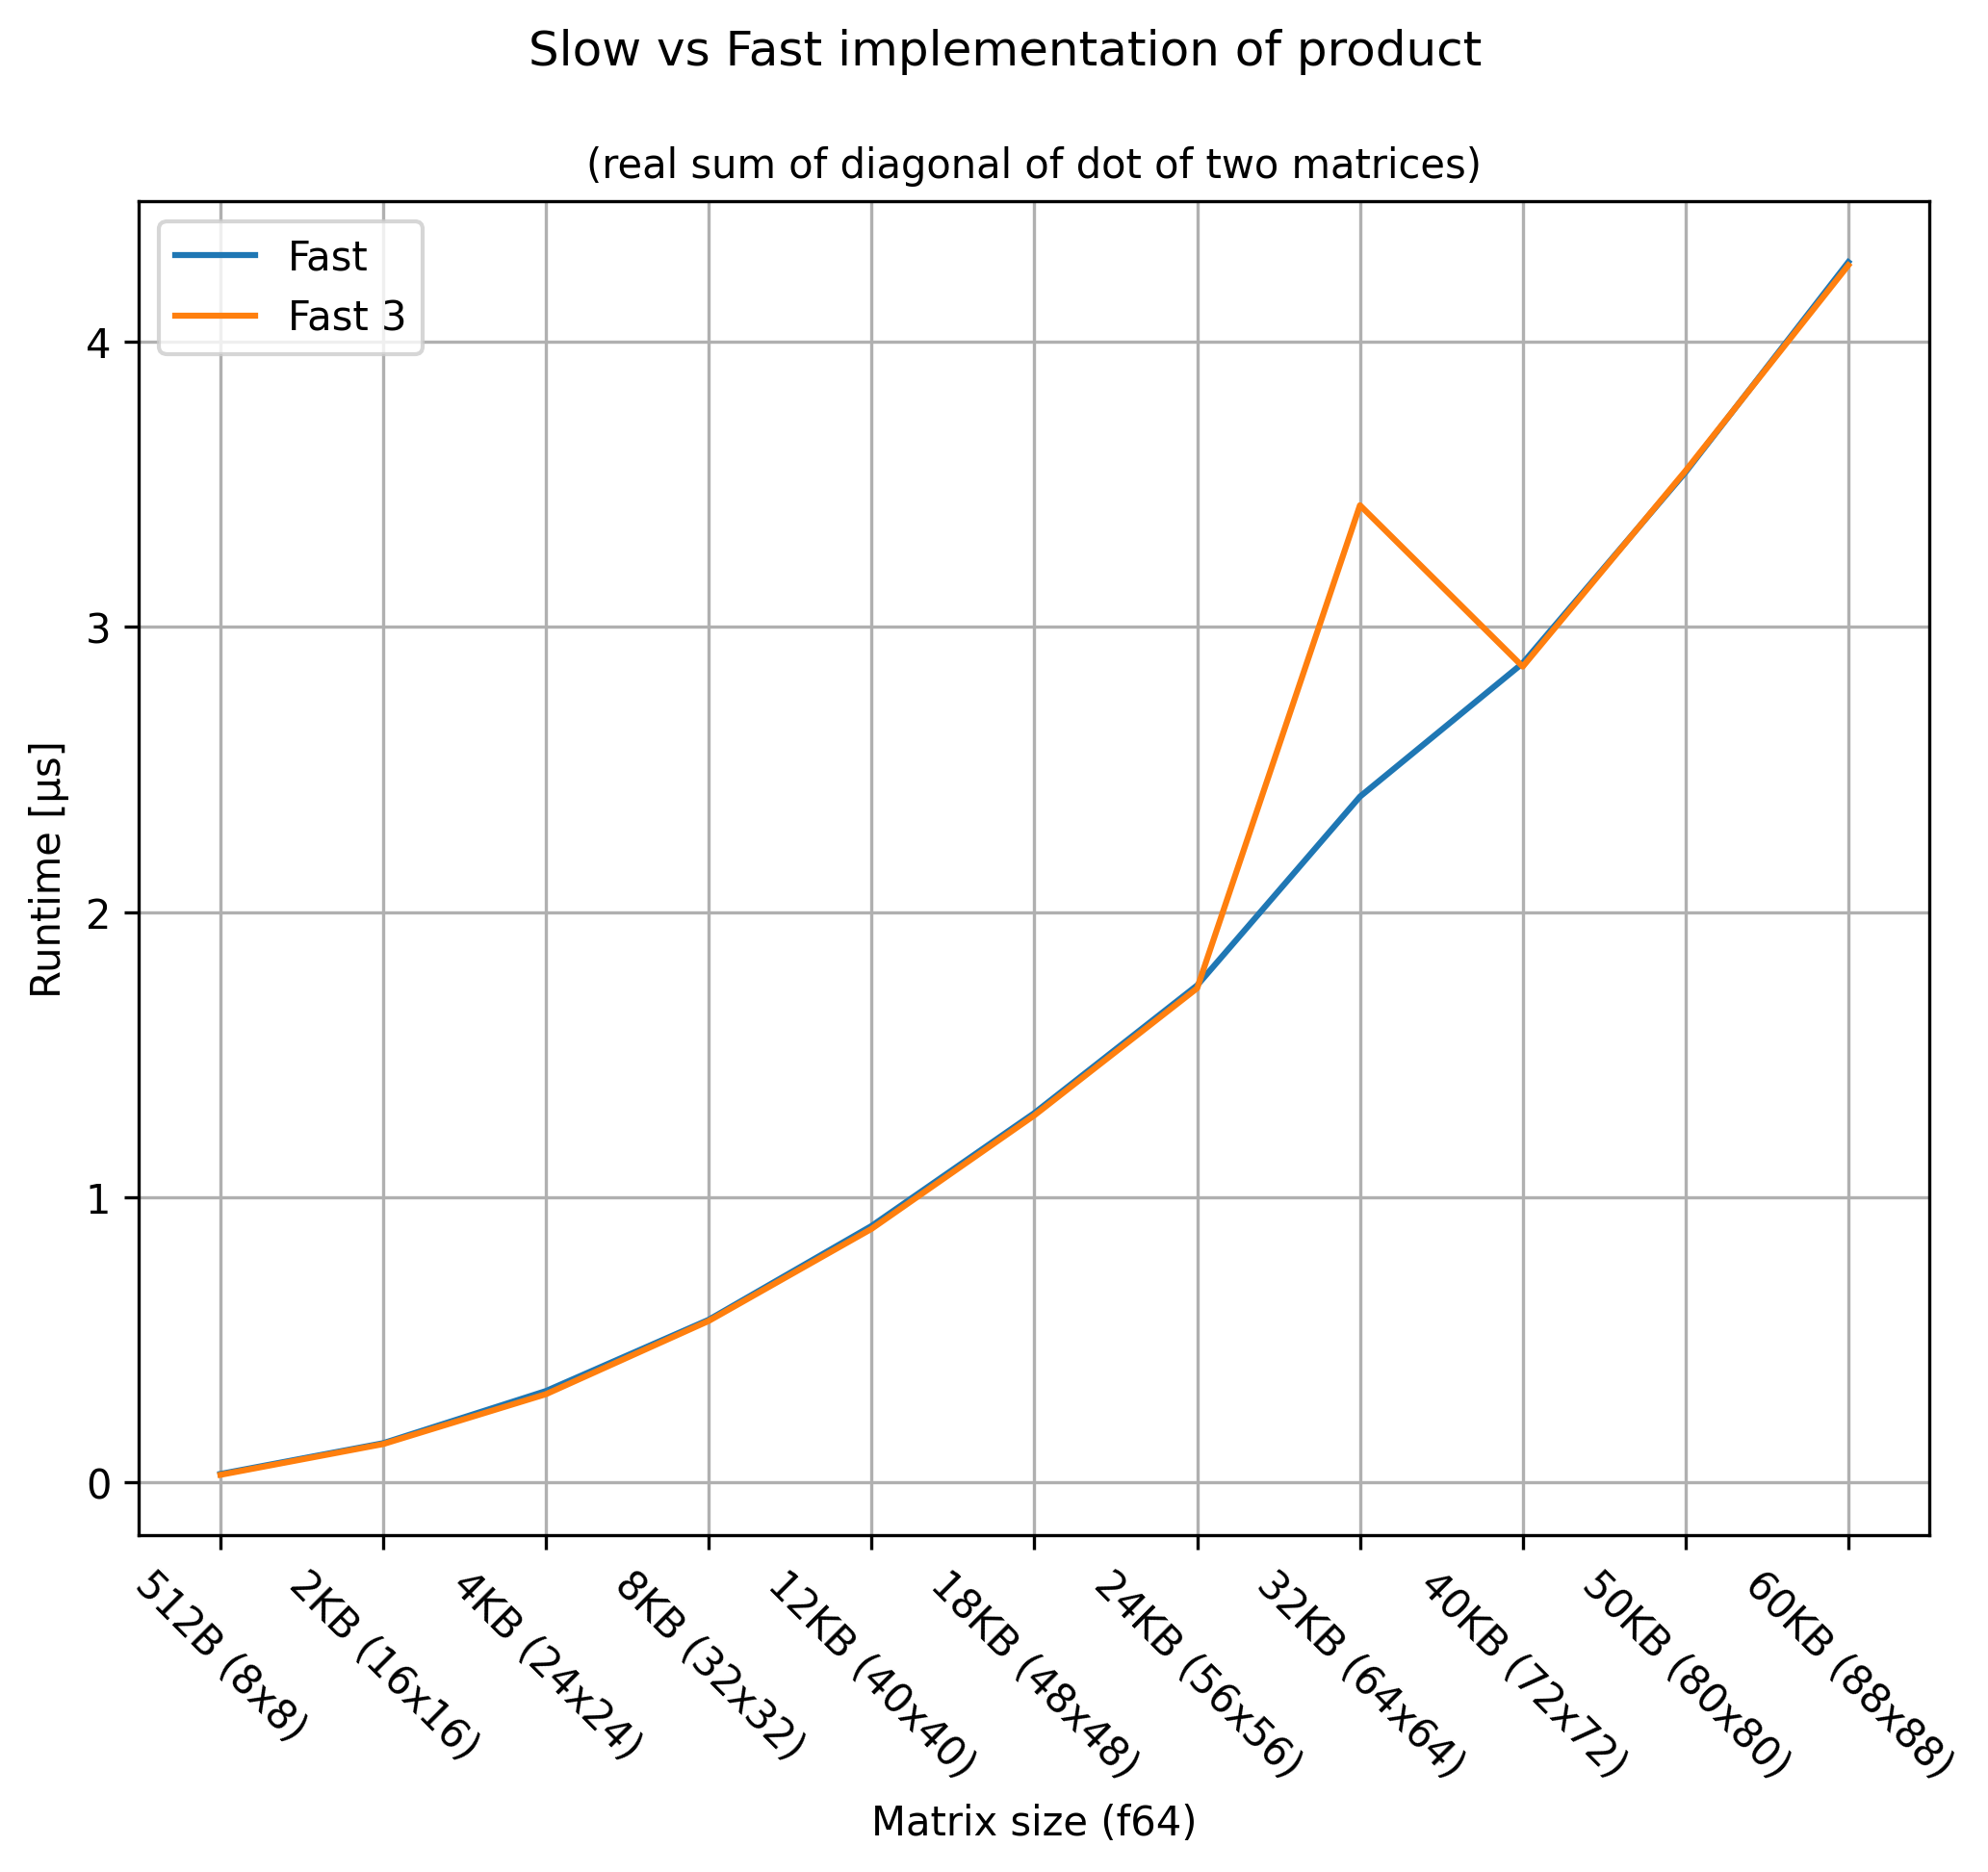

In [8]:
plt.figure(figsize=(8, 6), dpi=300)

# plt.plot(results_slow, label="Slow")
# plt.plot(results_slow_2, label="Slow 2")
# plt.plot(results_fast, label="Fast")
# plt.plot(results_fast_2, label="Fast 2")
plt.plot(results_fast_3, label="Fast 3")

plt.xticks(list(range(len(labels))), labels, rotation=-45)
plt.xlabel("Matrix size (f64)")
plt.ylabel("Runtime [µs]")

plt.legend()

plt.grid(True)
plt.suptitle(
    "Slow vs Fast implementation of product",
    fontsize="large",
)
plt.title(
    "(real sum of diagonal of dot of two matrices)",
    fontsize="medium",
)

pass
